In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
data=pd.read_csv("TrainingData.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head()

,application_key,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,...,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47,mvar48,default_ind
0,230032,1696,1.6541,0.000,0.0,0.0,0,6015,322,40369,...,73.78,82.547,0.08696,10,0.63899,na,0,C,10,0
1,230033,1846,0.8095,0.000,0.0,0.0,102,7532,3171,18234,...,99.129,missing,0,13,0.63836,na,na,L,732,1
2,230034,1745,0.4001,0.000,0.0,0.0,missing,2536,missing,missing,...,missing,29.29,0,1,1.00000,na,0,C,89,1
3,230035,1739,0.2193,0.000,0.0,0.0,1982,26440,4955,20316,...,96.272,missing,0.15385,3,0.53241,0,0,L,3,0
4,230036,1787,0.0118,0.225,0.0,0.0,5451,5494,5494,7987,...,115.019,missing,0,1,0.92665,na,na,L,5,0


In [4]:
data.replace(['missing','na'],np.NaN,inplace=True)

data.replace(['C','L'],[-1,1],inplace=True)

data = data.drop('application_key', axis = 1)

In [5]:
data.head()

,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,...,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47,mvar48,default_ind
0,1696,1.6541,0.000,0.0,0.0,0,6015,322,40369,18414,...,73.78,82.547,0.08696,10,0.63899,NaN,0,-1,10,0
1,1846,0.8095,0.000,0.0,0.0,102,7532,3171,18234,13664,...,99.129,NaN,0,13,0.63836,NaN,NaN,1,732,1
2,1745,0.4001,0.000,0.0,0.0,NaN,2536,NaN,NaN,2536,...,NaN,29.29,0,1,1.00000,NaN,0,-1,89,1
3,1739,0.2193,0.000,0.0,0.0,1982,26440,4955,20316,37013,...,96.272,NaN,0.15385,3,0.53241,0,0,1,3,0
4,1787,0.0118,0.225,0.0,0.0,5451,5494,5494,7987,4696,...,115.019,NaN,0,1,0.92665,NaN,NaN,1,5,0


In [6]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

In [7]:
imputer = IterativeImputer(BayesianRidge())
imputed_data = pd.DataFrame(imputer.fit_transform(data))

In [8]:
imputed_data.head()

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,1696.0,1.6541,0.000,0.0,0.0,0.000000,6015.0,322.000000,40369.000000,18414.0,...,73.780000,82.547000,0.08696,10.0,0.63899,0.215527,0.000000,-1.0,10.0,0.0
1,1846.0,0.8095,0.000,0.0,0.0,102.000000,7532.0,3171.000000,18234.000000,13664.0,...,99.129000,69.742361,0.00000,13.0,0.63836,0.021973,0.003556,1.0,732.0,1.0
2,1745.0,0.4001,0.000,0.0,0.0,1783.396005,2536.0,2923.753197,20172.270169,2536.0,...,67.659013,29.290000,0.00000,1.0,1.00000,0.158048,0.000000,-1.0,89.0,1.0
3,1739.0,0.2193,0.000,0.0,0.0,1982.000000,26440.0,4955.000000,20316.000000,37013.0,...,96.272000,70.812276,0.15385,3.0,0.53241,0.000000,0.000000,1.0,3.0,0.0
4,1787.0,0.0118,0.225,0.0,0.0,5451.000000,5494.0,5494.000000,7987.000000,4696.0,...,115.019000,74.680013,0.00000,1.0,0.92665,-0.051791,-0.000412,1.0,5.0,0.0


In [9]:
X=imputed_data.drop(48, axis = 1)
Y = imputed_data.iloc[:, 48]

In [14]:
from sklearn import preprocessing
X = pd.DataFrame(preprocessing.scale(X))

In [15]:
from sklearn.decomposition import PCA
pca = PCA(.95)

In [16]:
pca.fit(X)
print (pca.n_components_)

31


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [22]:
trainX = pd.DataFrame(pca.transform(X_train))
testX = pd.DataFrame(pca.transform(X_test))

In [23]:
trainX.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,-3.703087,-0.772439,3.190865,0.878077,0.104630,0.474845,2.176073,1.116675,0.356865,-0.187169,...,1.737215,-0.111820,0.864959,0.814013,-0.449796,-0.442781,2.193082,0.756957,0.327645,0.247074
1,-1.871598,-2.642146,0.148932,-0.491694,-0.396575,0.248642,0.387176,-0.349013,-0.493139,0.476359,...,-0.001026,0.161654,-1.135164,-0.126390,-0.076962,-0.406447,-0.390166,0.803162,0.403207,0.472245
2,-2.650732,-0.201007,-1.716547,2.319034,-0.533921,0.401649,0.808220,0.073913,0.287350,1.164231,...,0.573689,-0.482931,-1.325285,-0.766448,1.223539,-0.024881,-1.063376,0.307112,-0.020640,-0.476300
3,-2.982670,-2.332464,-0.515908,-1.210443,0.069624,0.429178,0.159299,-0.203156,-0.833721,0.271847,...,0.190443,-0.070548,-0.464286,-0.024354,-0.248037,-0.044455,-0.161955,0.347099,0.687573,0.478676
4,-0.020783,-0.186750,-0.878921,0.819161,-0.965844,-0.066996,-0.082139,-0.240739,0.946162,0.107325,...,-0.013681,-0.449228,-0.346460,-0.014939,1.423774,-0.458999,-1.069315,-0.509018,0.088546,-0.744881


In [24]:
import xgboost as xgb
model = xgb.XGBClassifier(max_depth=7,
                           min_child_weight=1,
                           learning_rate=0.11,
                           n_estimators=700,
                           silent=True,
                           objective='binary:logistic',
                           gamma=3,
                           max_delta_step=1000,
                           subsample=1,
                           colsample_bytree=1,
                           colsample_bylevel=1,
                           reg_alpha=50,
                           reg_lambda=10,
                           scale_pos_weight=3.5,
                           seed=1,
                           missing=None)

C:\ProgramData\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\ProgramData\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [25]:
model=model.fit(trainX, y_train)

In [26]:
y_pred = model.predict(testX)

In [27]:
print(sklearn.metrics.accuracy_score(y_test, y_pred))
print(sklearn.metrics.f1_score(y_test, y_pred))
print(sklearn.metrics.balanced_accuracy_score(y_test, y_pred))
print(sklearn.metrics.precision_score(y_test, y_pred))
print(sklearn.metrics.recall_score(y_test, y_pred))

0.7196385542168675
0.6016093134737203
0.7231767404311509
0.510854816824966
0.7315752949340736


In [28]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[12648,  5047],
       [ 1934,  5271]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

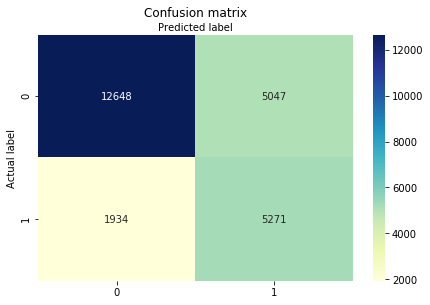

In [29]:
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')